<a href="https://colab.research.google.com/github/BeautifulTovarisch/statistics-potpourri/blob/main/basic_probability/sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling

This notebook demonstrates random experiments that sample with and without _replacement_. In this example, the population consists of 7 fish, 3 gold and 4 silver. We want to know the probability of catching $n$ gold fish, $G_n$.

The solution depends on whether we release each fish after capture or whether we reduce the population each iteration.

1. **With** _Replacement_ - Replaces the population each choice.
2. **Without** _Replacement_ reduces the population by the number of choices each time

In [1]:
import Pkg

Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("StatsBase")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Fishing

This simulation compares the probability of catching gold fish with and without replacement.

> TODO: update with formula derivations later

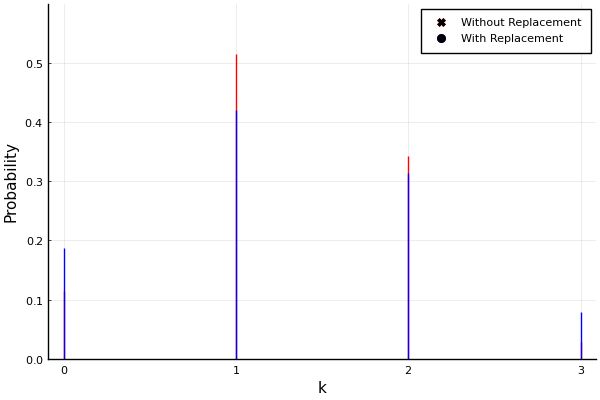

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [2]:
"""
Fishing Simulation

This program uses a Monte Carlo simulation to approximate the chance of choosing
`k` gold fish out of a population of `n` with and without replacement.
"""

using StatsBase, Plots; pyplot()

N = 10^6

"""
simulateFish approximates the probability of catching `k` gold fish out of a
total population of `numGold + numSilver`. The approximation is performed via a
Monte Carlo simluation with `iter` iterations. `replace` determines whether the
sampling is performed with or without replacement.

TODO: Using a list for this simulation wastes cycles on removing elements. This
can almost certainly be modeled using bitvectors instead.
"""
function simulateFish(numGold, numSilver, k, iter, replace=false)
  # Draw `k` fish from the total number of fish
  function fish()
    pond = [ones(Int64, numGold) ; zeros(Int64, numSilver)]
    fished = Int64[]

    for _ in 1:k
      caught = rand(pond)
      push!(fished, caught)

      if replace == false
        deleteat!(pond, findfirst(x -> x == caught, pond))
      end
    end

    return sum(fished)
  end

  # Run `iter` simulations and count the proportion of 0, 1, 2, ..., k gold fish
  # caught.
  simulation = [fish() for _ in 1:iter]
  hist = counts(simulation, 0:k) / iter

  if replace == true
    plot!(0:k, hist,
      line=:stem, marker=:circle, c=:blue, msw=6, ms=0,
      label="With Replacement",
      xlabel="k",
      ylims=(0, 0.6),
      ylabel="Probability")
  else
    plot!(0:k, hist,
      line=:stem, marker=:xcross, c=:red, msw=6, ms=0,
      label="Without Replacement",
      xlabel="k",
      ylabel="Probability")
  end
end

gold, silver, k = 3, 4, 3

simulateFish(gold, silver, k, N)
simulateFish(gold, silver, k, N, true)